In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df

,state,constituency,image,result,votes,margin,name,party
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,won,102436,+ 24396,BISHNU PADA RAY,Bharatiya Janata Party
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,342,-102094,ANAND RAMNATH ARLEKAR,Independent
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,351,-102085,SALAMAT MONDAL,Socialist Unity Centre Of India (COMMUNIST)
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,380,-102056,USHA KUMARI,Independent
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,507,-101929,K VENKAT RAM BABU,Independent
...,...,...,...,...,...,...,...,...
8897,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,749125,-39250,NISITH PRAMANIK,Bharatiya Janata Party
8898,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,30267,-758108,NITISH CHANDRA ROY,All India Forward Bloc
8899,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,10679,-777696,PIYA ROY CHOWDHURY,Indian National Congress
8900,West Bengal,Bolpur,https://results.eci.gov.in/uploads4/candprofil...,lost,2792,-852841,BIJOY DOLUI,Socialist Unity Centre Of India (COMMUNIST)


In [4]:

df.isnull().sum()


state             0
constituency      0
image             0
result          542
votes             0
margin            0
name              0
party             0
dtype: int64

In [5]:
df.describe()

,votes
count,8.902000e+03
mean,7.249646e+04
std,1.798988e+05
min,0.000000e+00
25%,1.094250e+03
50%,2.781000e+03
75%,9.759500e+03
max,1.471885e+06


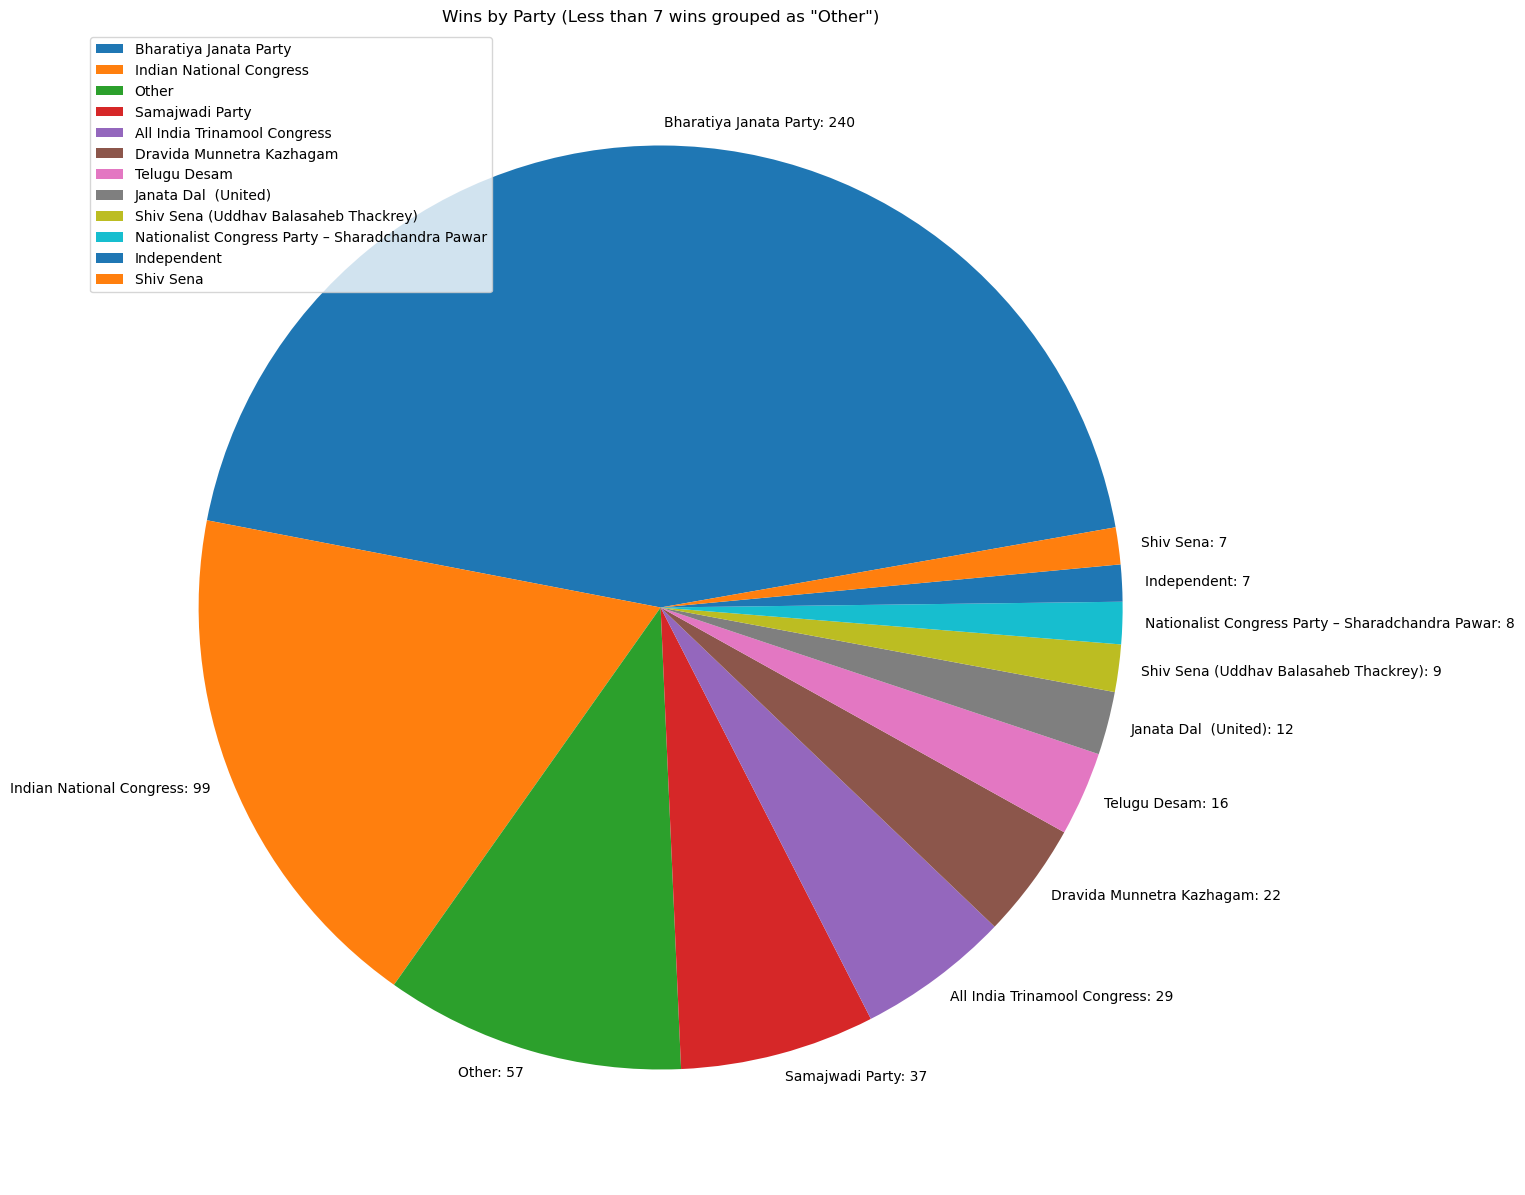

In [6]:

df_won = df[df['result'] == 'won']
final_counts = df_won['party'].value_counts()

# Group parties with less than 7 wins as 'Other'
final_counts['Other'] = final_counts[final_counts < 7].sum()
final_counts = final_counts[final_counts >= 7]

# Sort the final counts
final_counts = final_counts.sort_values(ascending=False)



# Construct new labels that include both party names and their counts
labels_with_counts = [f'{label}: {count}' for label, count in zip(final_counts.index, final_counts)]

plt.figure(figsize=(20, 15))
plt.pie(final_counts, labels=labels_with_counts, startangle=10, labeldistance=1.05)
plt.title('Wins by Party (Less than 7 wins grouped as "Other")')
plt.legend(final_counts.index, loc='upper left')
plt.show()

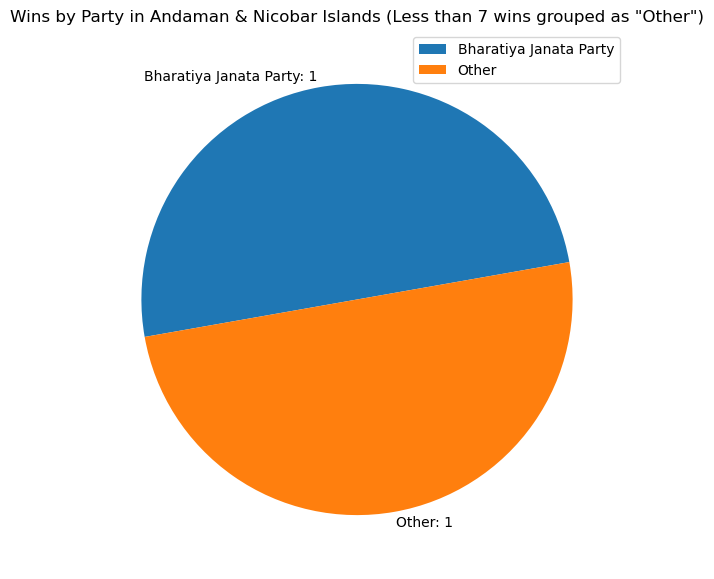

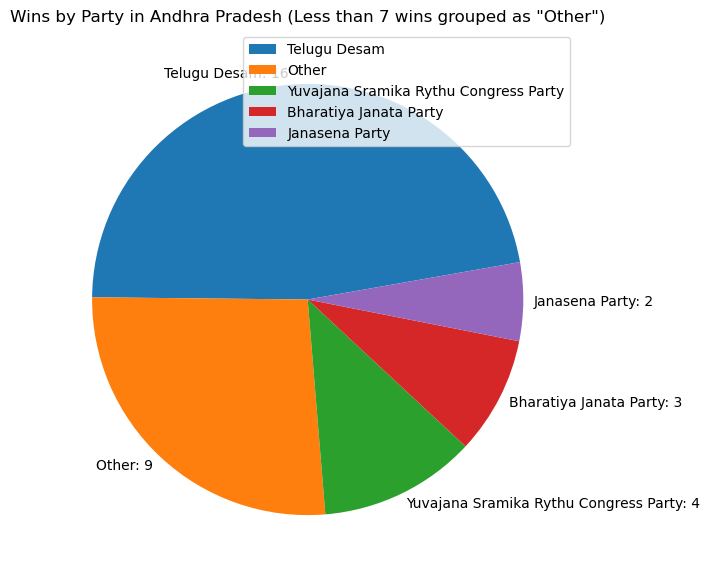

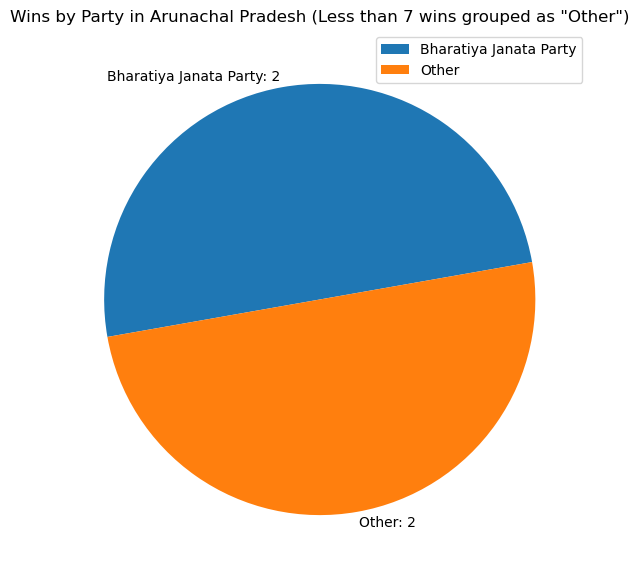

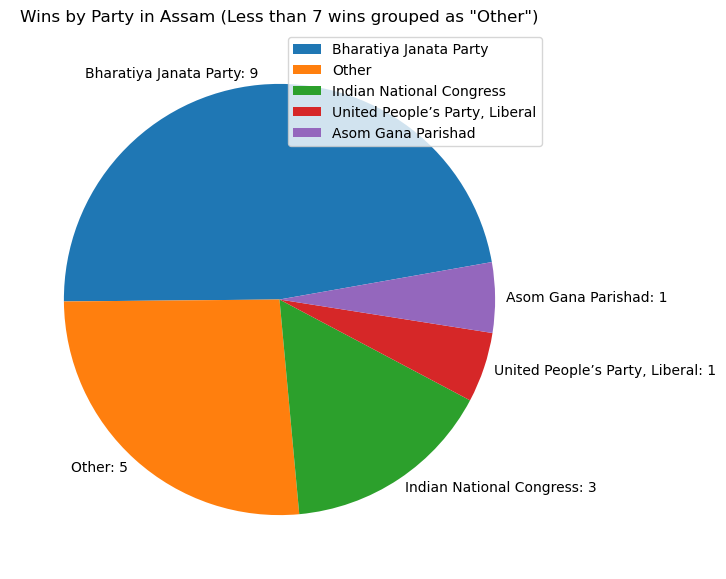

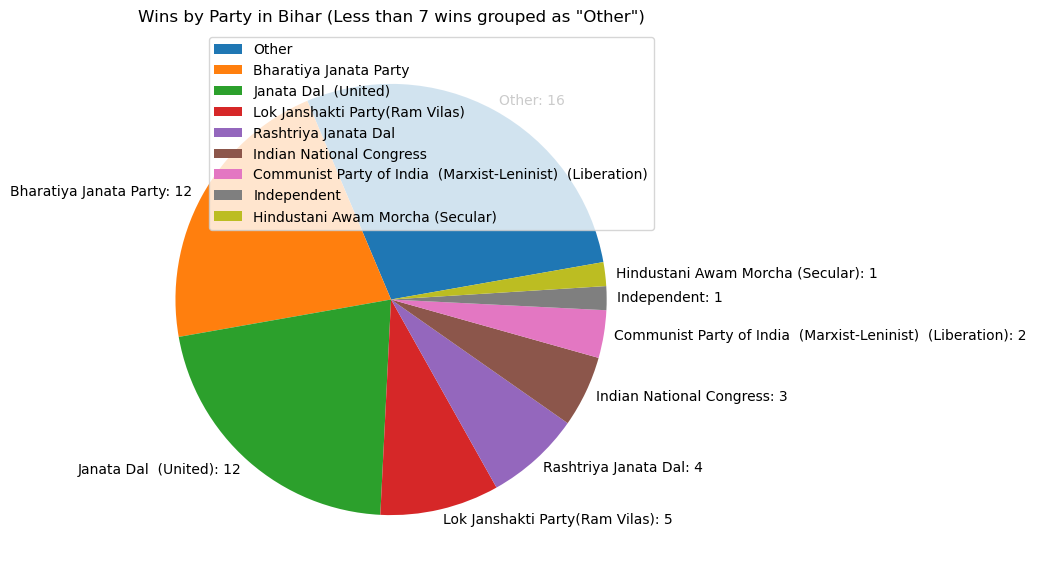

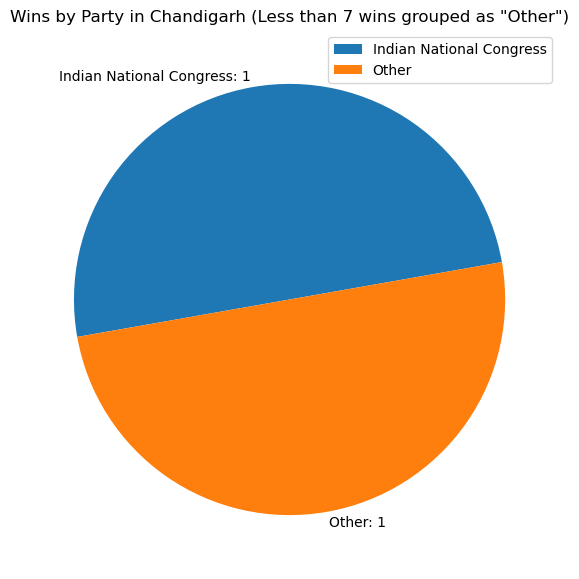

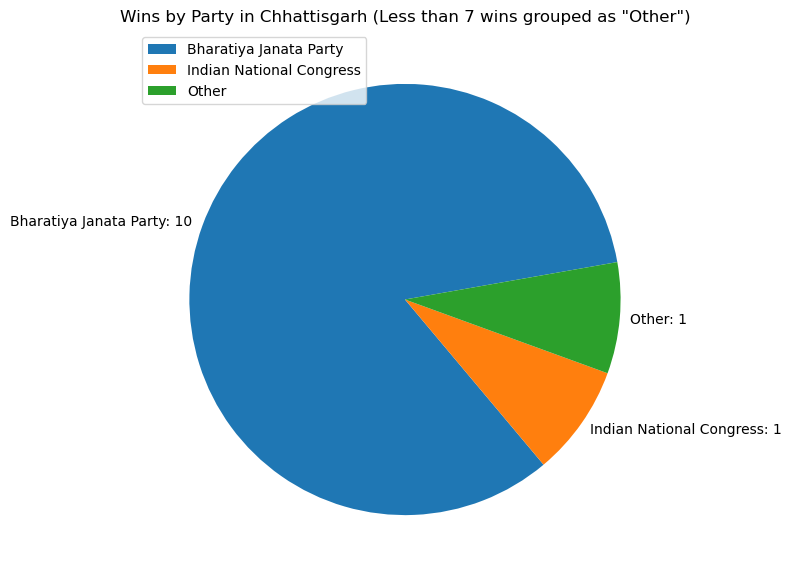

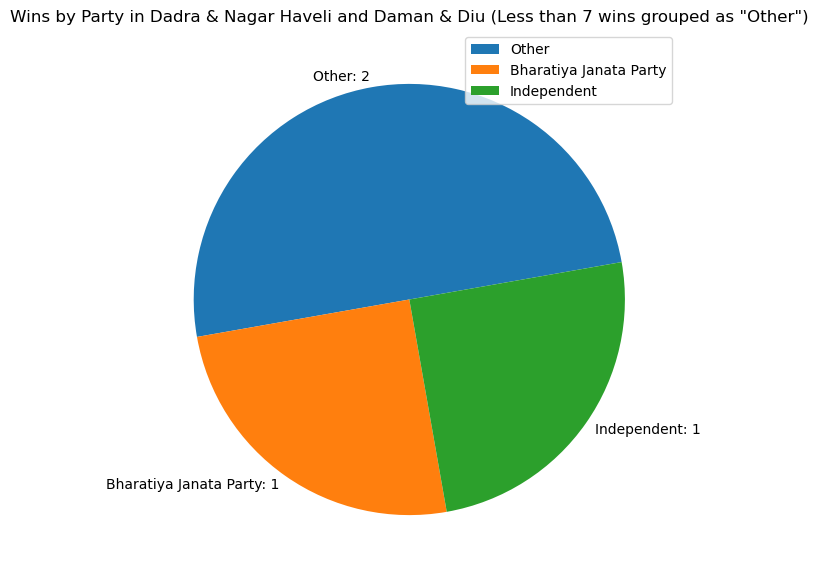

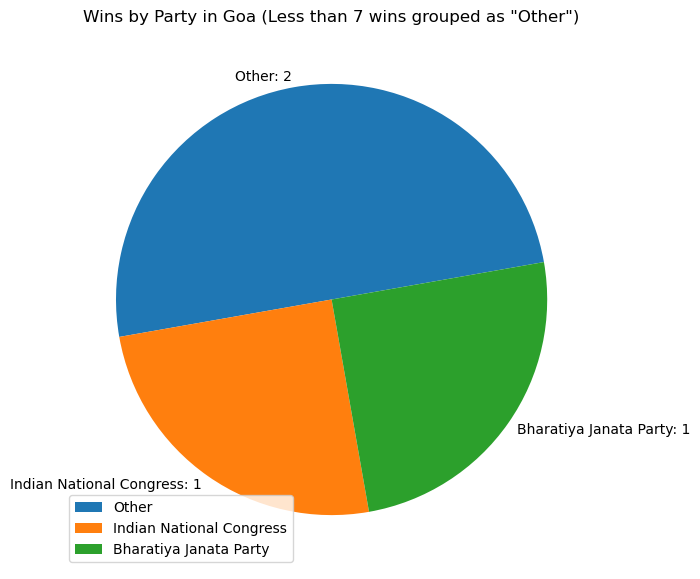

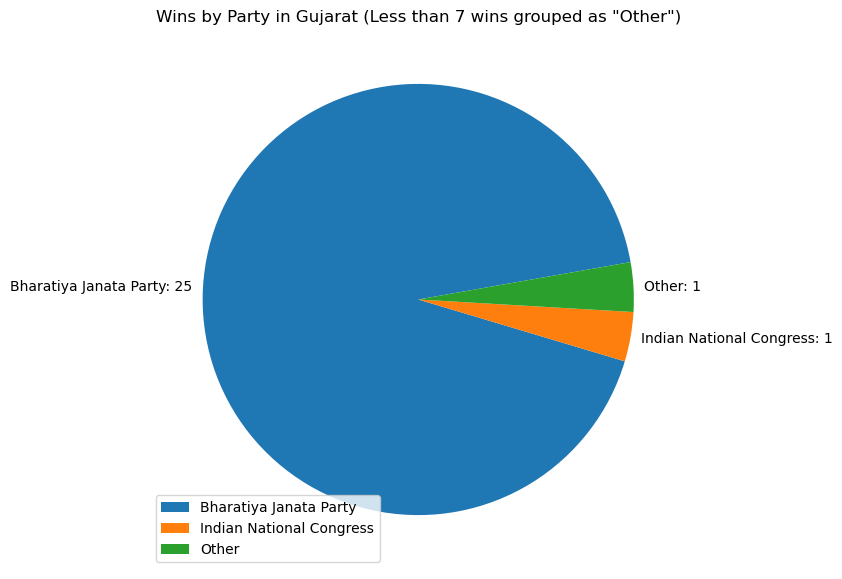

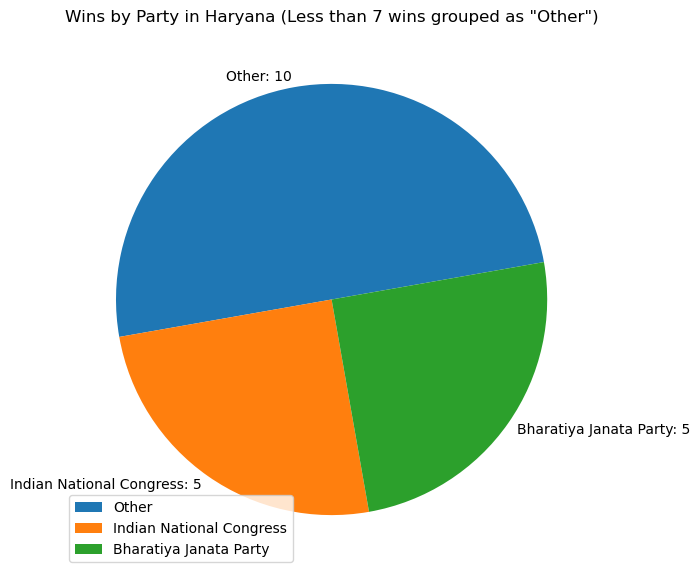

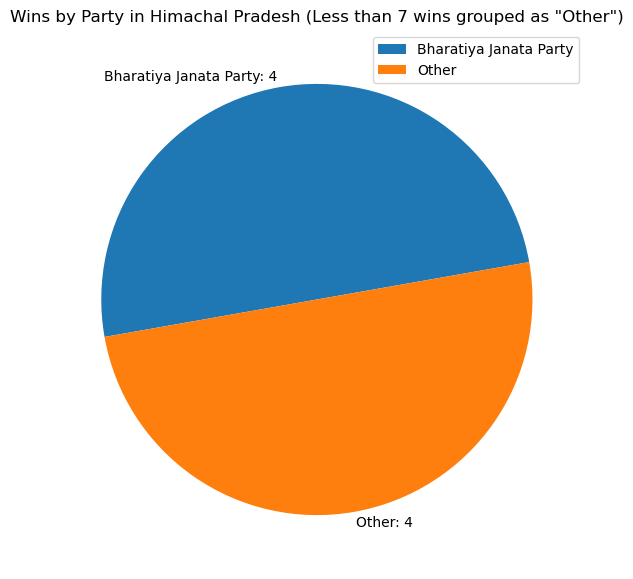

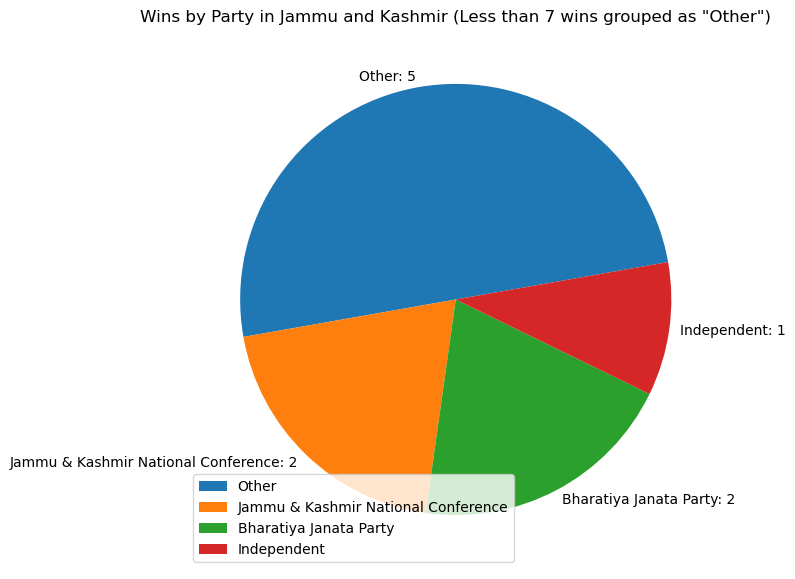

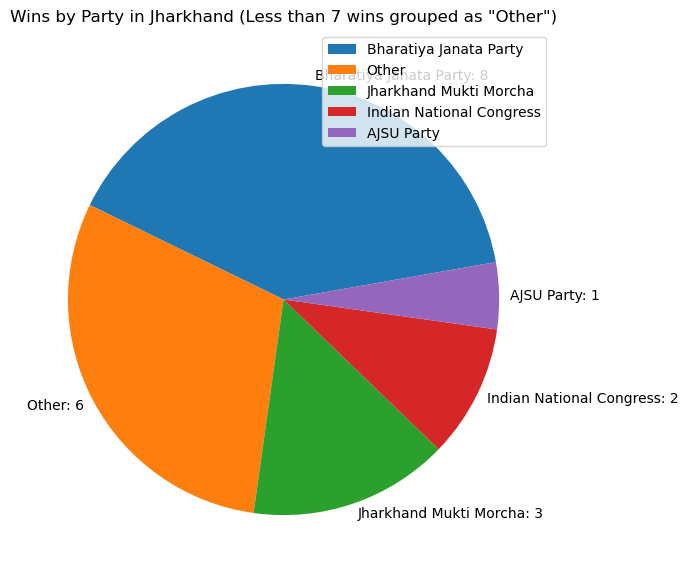

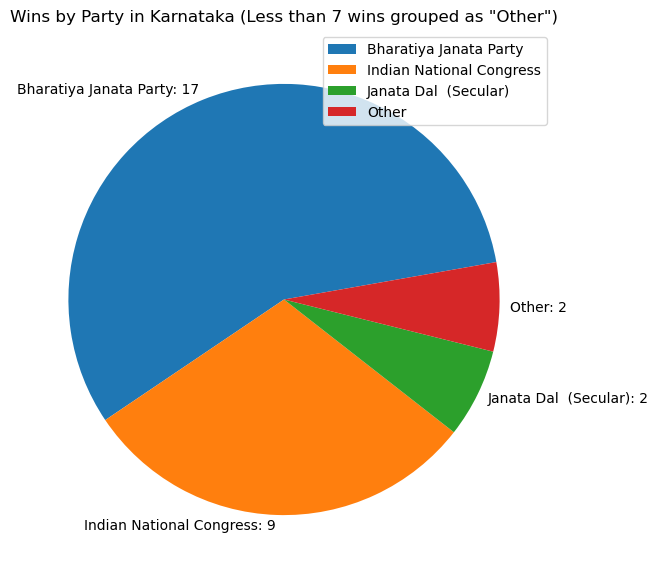

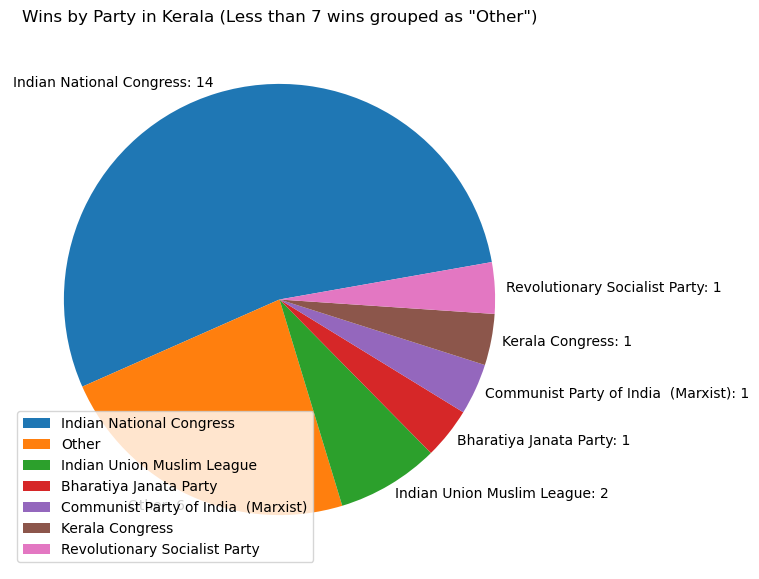

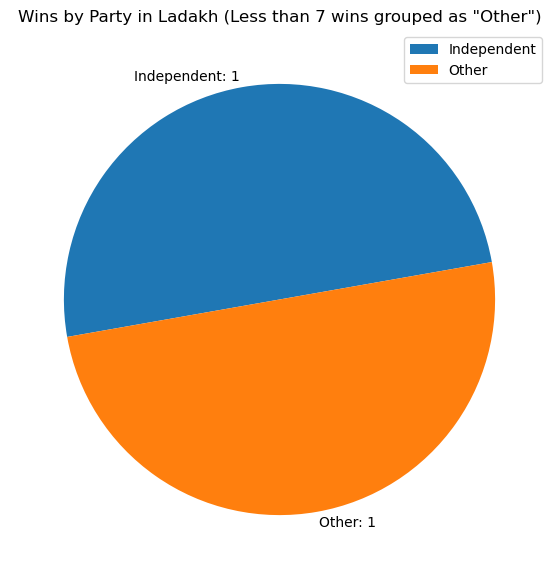

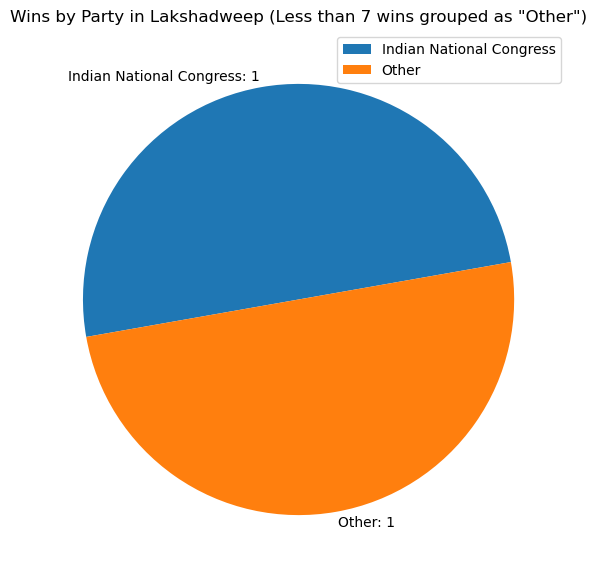

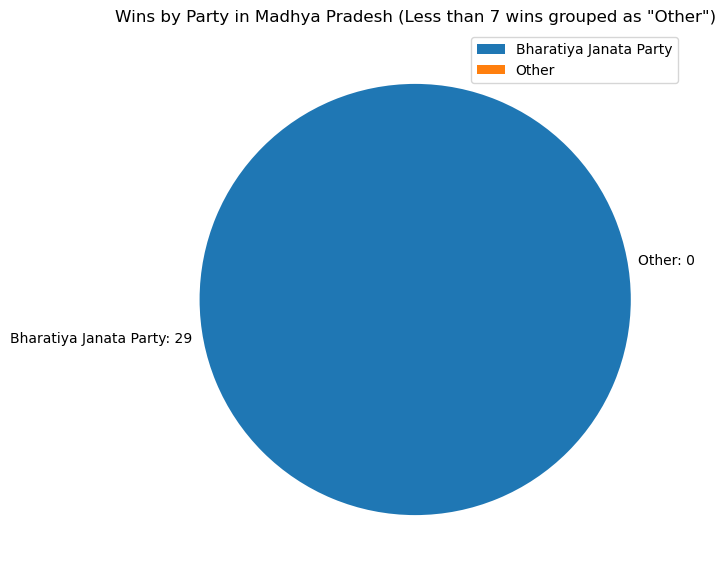

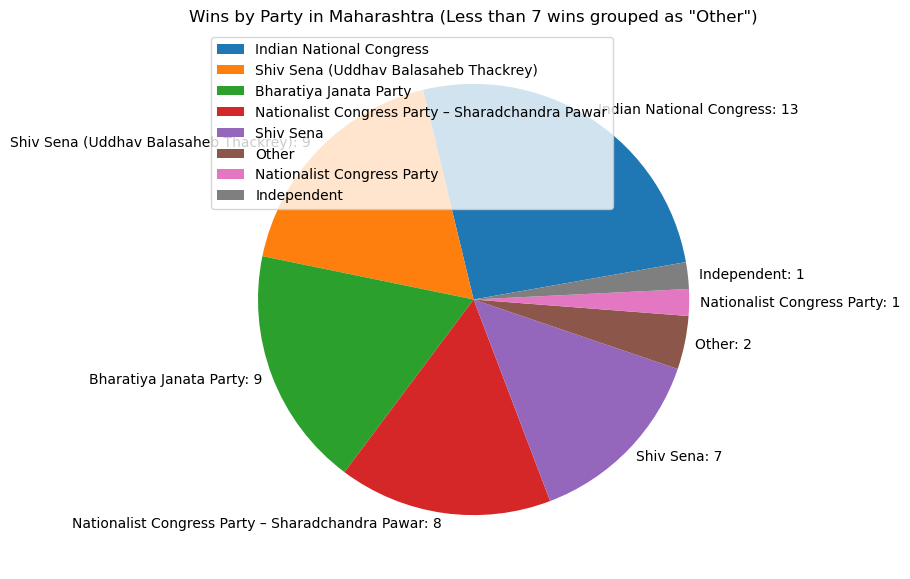

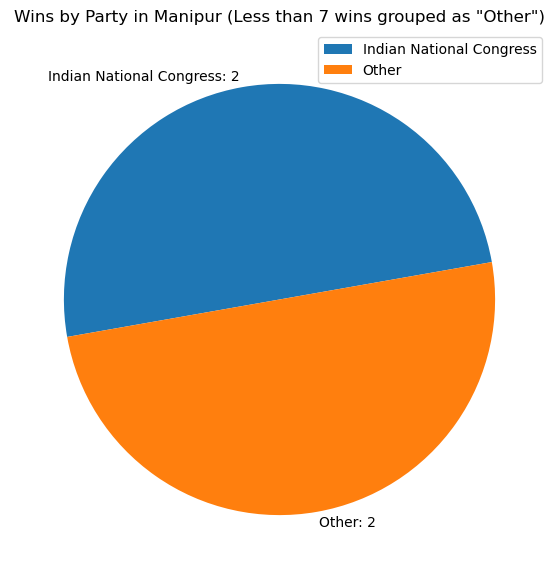

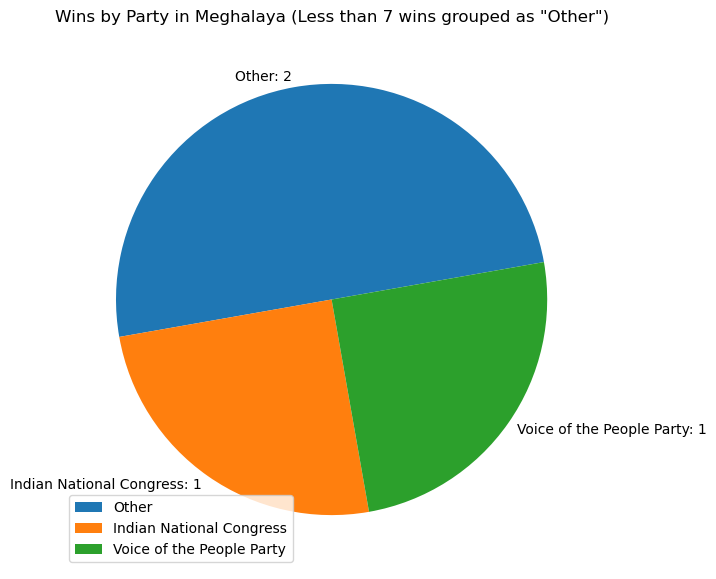

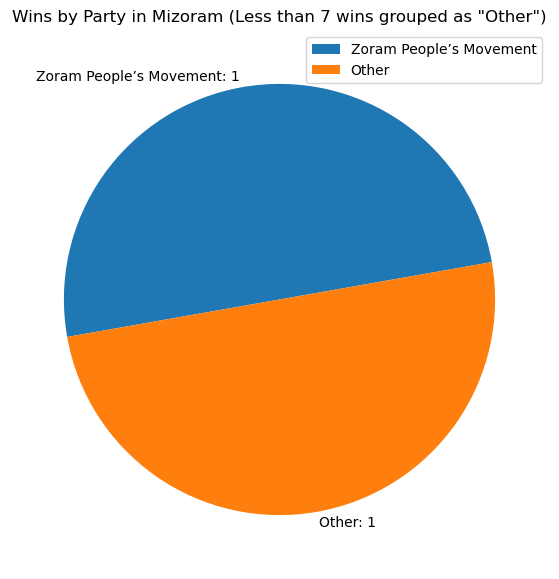

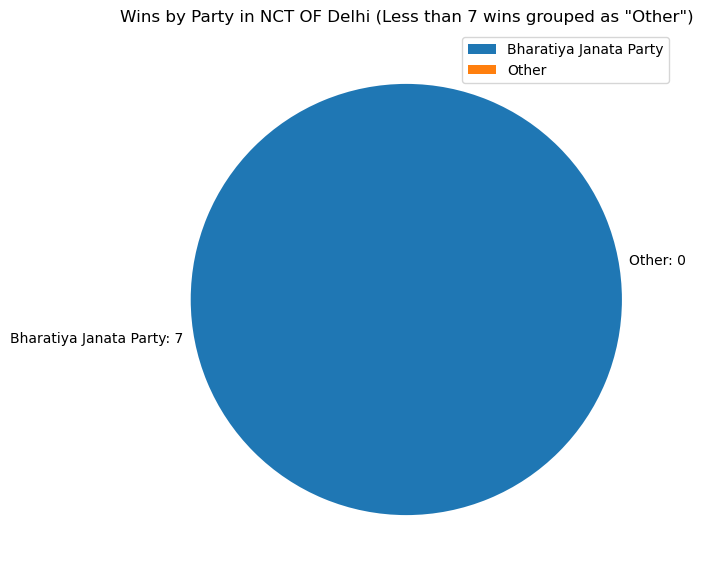

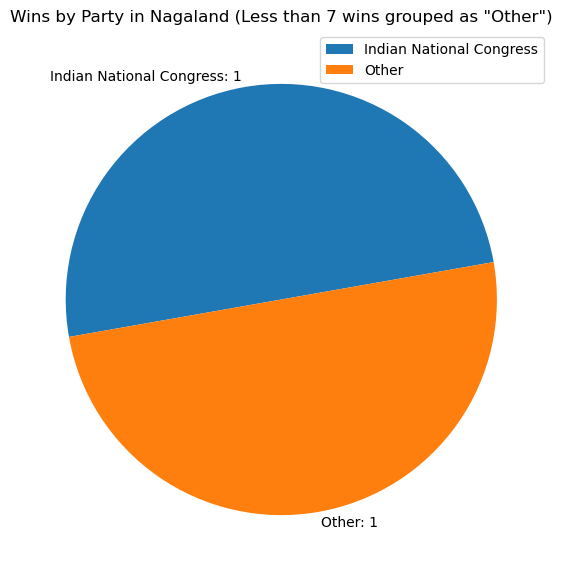

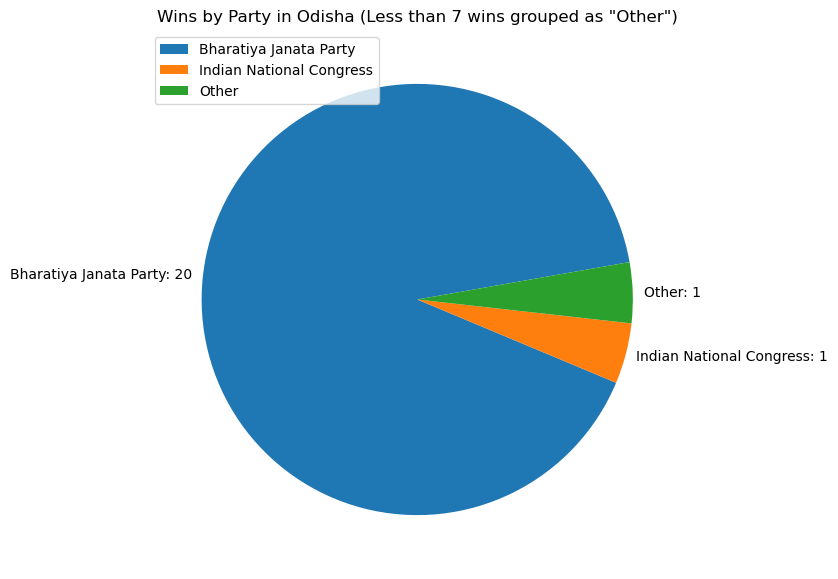

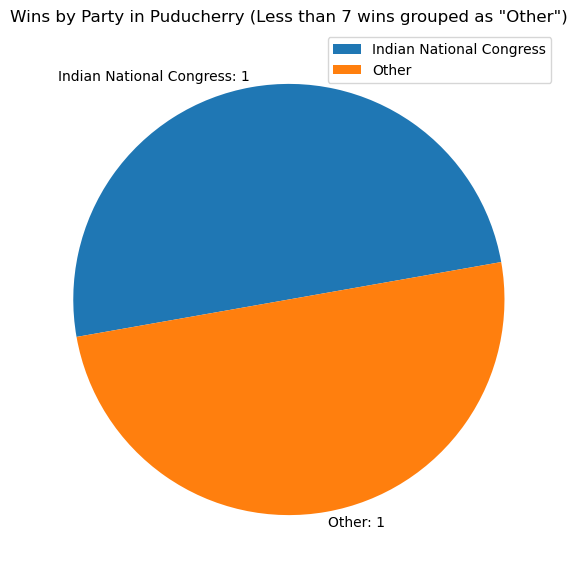

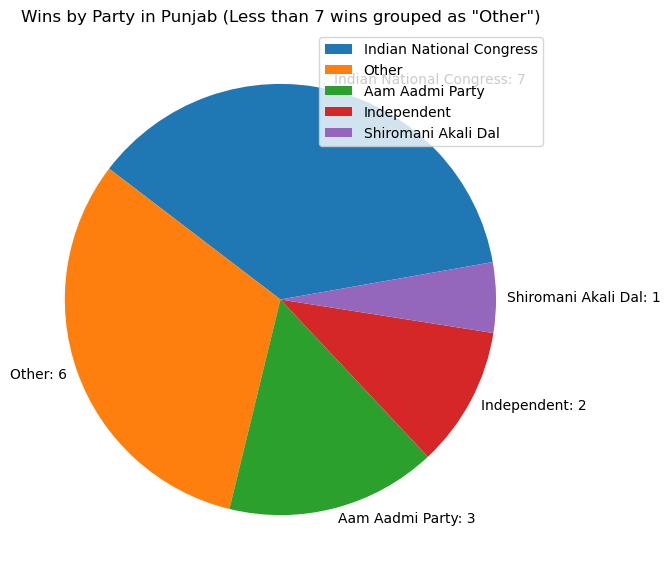

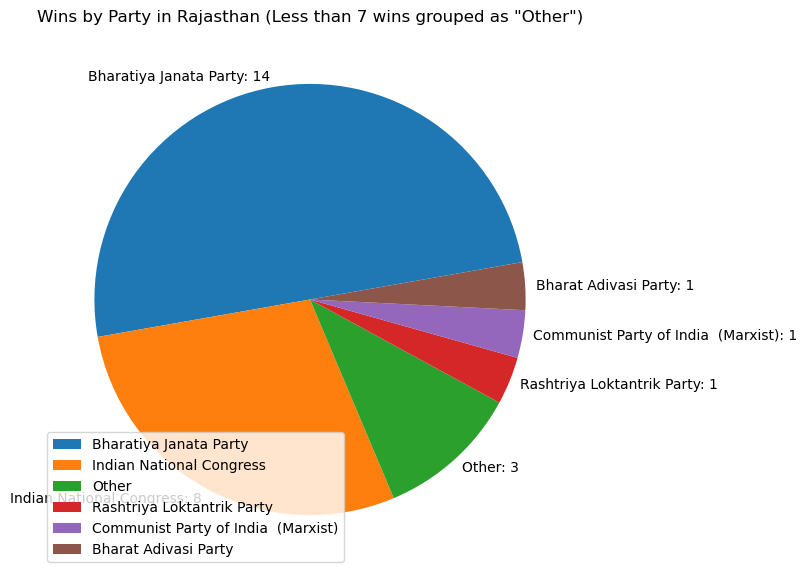

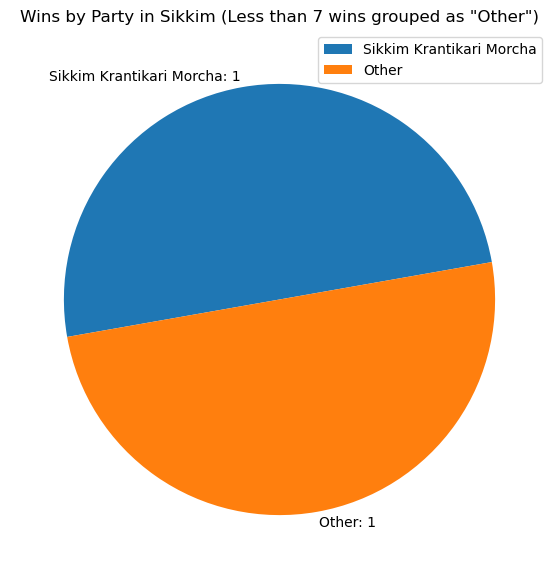

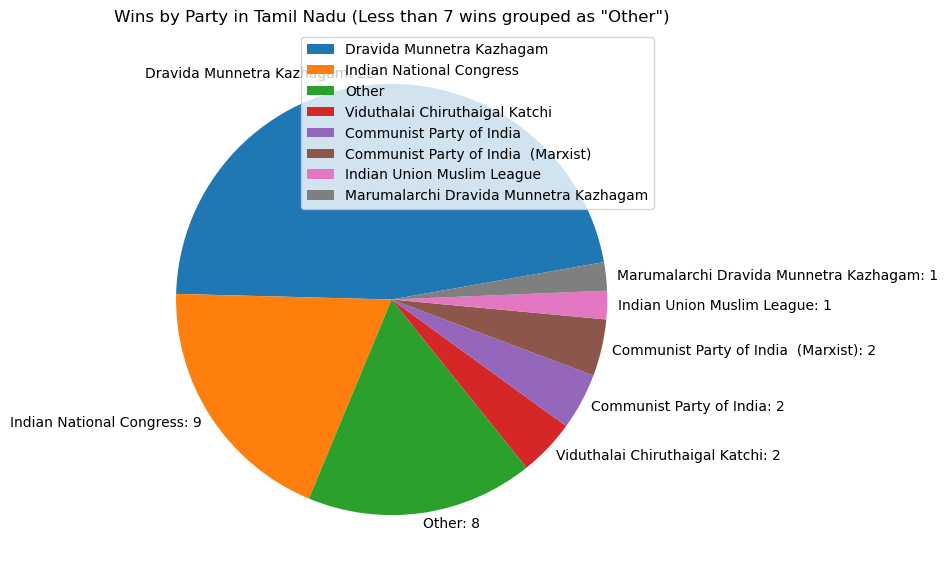

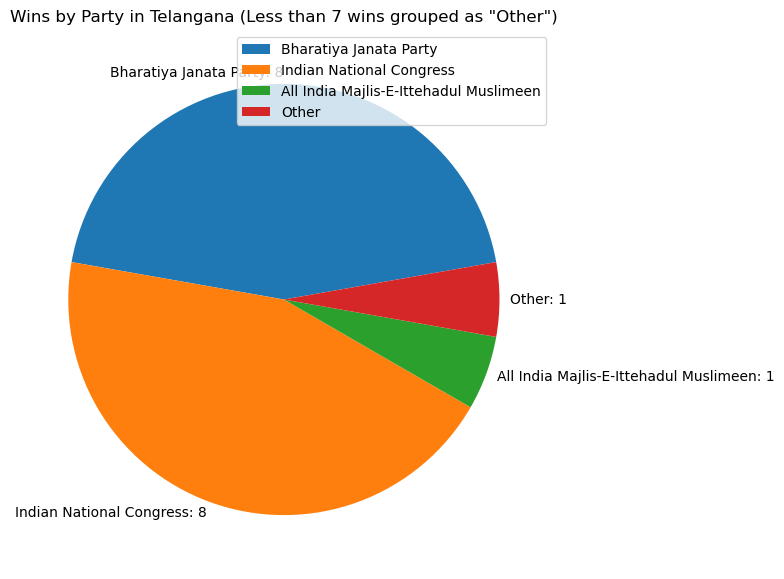

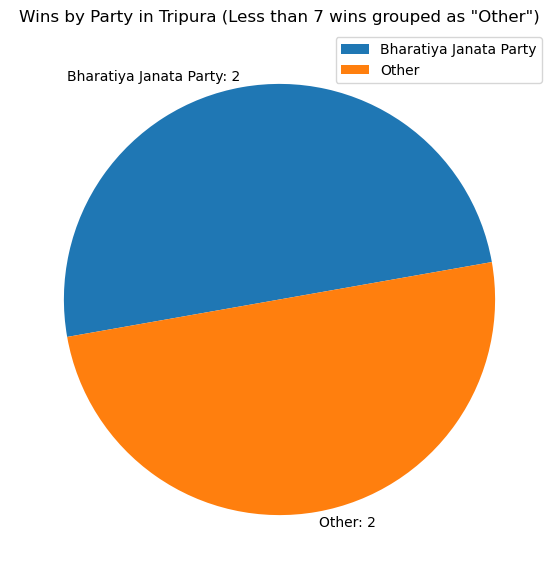

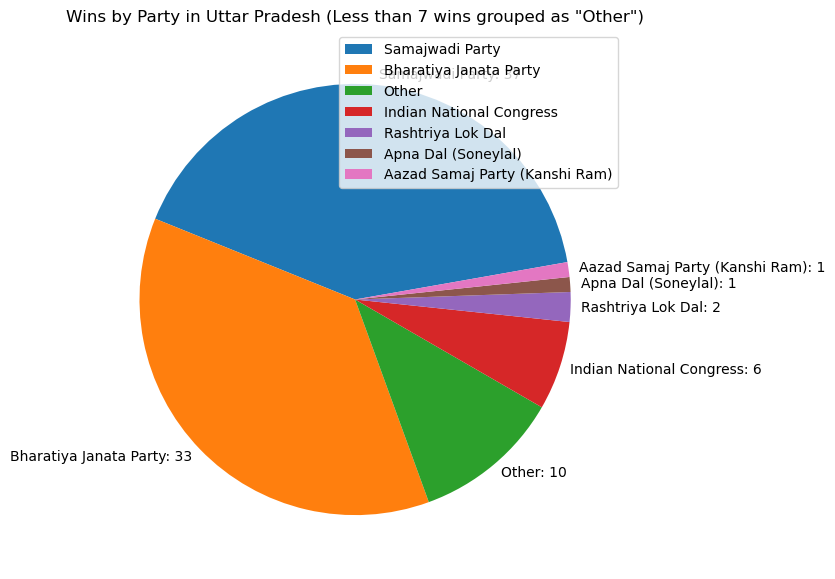

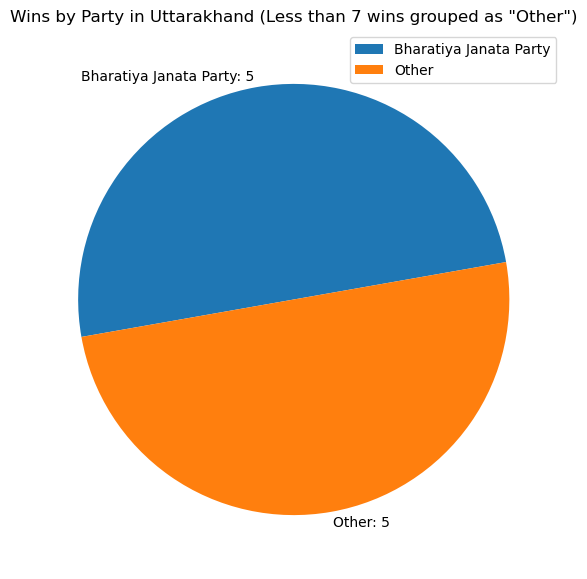

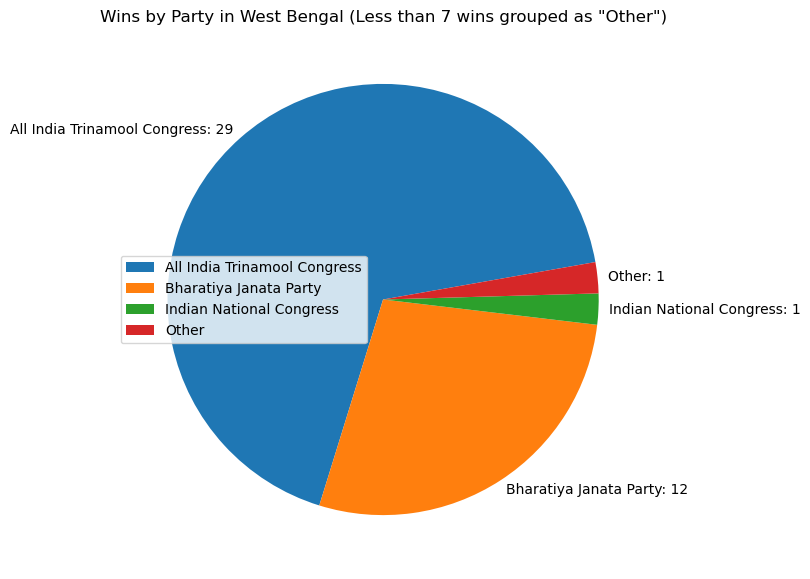

In [7]:
for state in df['state'].unique():
    df_state = df[df['state'] == state]
    df_state_won = df_state[df_state['result'] == 'won']
    final_counts = df_state_won['party'].value_counts()

    # Group parties with less than 7 wins as 'Other'
    final_counts['Other'] = final_counts[final_counts < 7].sum()
    # final_counts = final_counts[final_counts >= 7]

    # Sort the final counts
    final_counts = final_counts.sort_values(ascending=False)

    # Construct new labels that include both party names and their counts
    labels_with_counts = [f'{label}: {count}' for label, count in zip(final_counts.index, final_counts)]

    plt.figure(figsize=(10, 7))
    plt.pie(final_counts, labels=labels_with_counts, startangle=10, labeldistance=1.05)
    plt.title(f'Wins by Party in {state} (Less than 7 wins grouped as "Other")')
    plt.legend(final_counts.index, loc='best')
    plt.show()
    
        

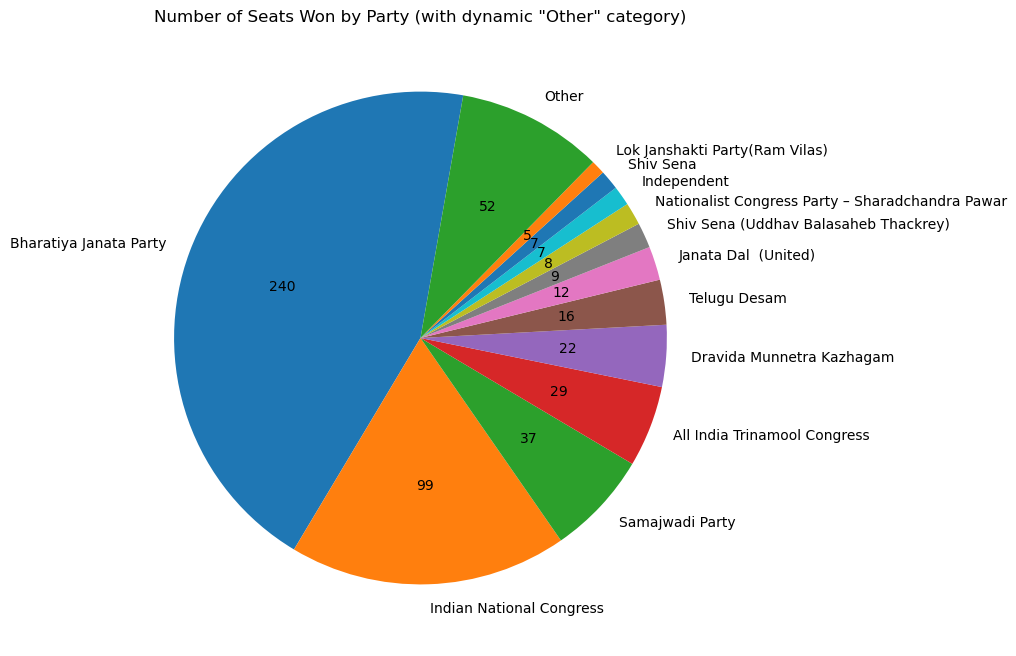

In [8]:
# Plotting the number of seats won by party
seats_won_by_party = df[df['result'] == 'won']['party'].value_counts()

threshold = 5
parties_below_threshold = seats_won_by_party[seats_won_by_party < threshold]

other_category_count = parties_below_threshold.sum()

seats_won_by_party = seats_won_by_party.drop(parties_below_threshold.index)

if other_category_count > 0: 
    seats_won_by_party['Other'] = other_category_count

plt.figure(figsize=(10, 8))
plt.pie(seats_won_by_party, startangle=80, labels=seats_won_by_party.index, autopct=lambda p: '{:.0f}'.format(p * sum(seats_won_by_party) / 100))
plt.title('Number of Seats Won by Party (with dynamic "Other" category)')
plt.show()

     Candidate Type  Lost  Won  Average Vote Share  Average Winning Margin
0       Independent  3913    7            0.004155            89900.285714
1  Party-Affiliated  3904  536            0.105142           162450.263060


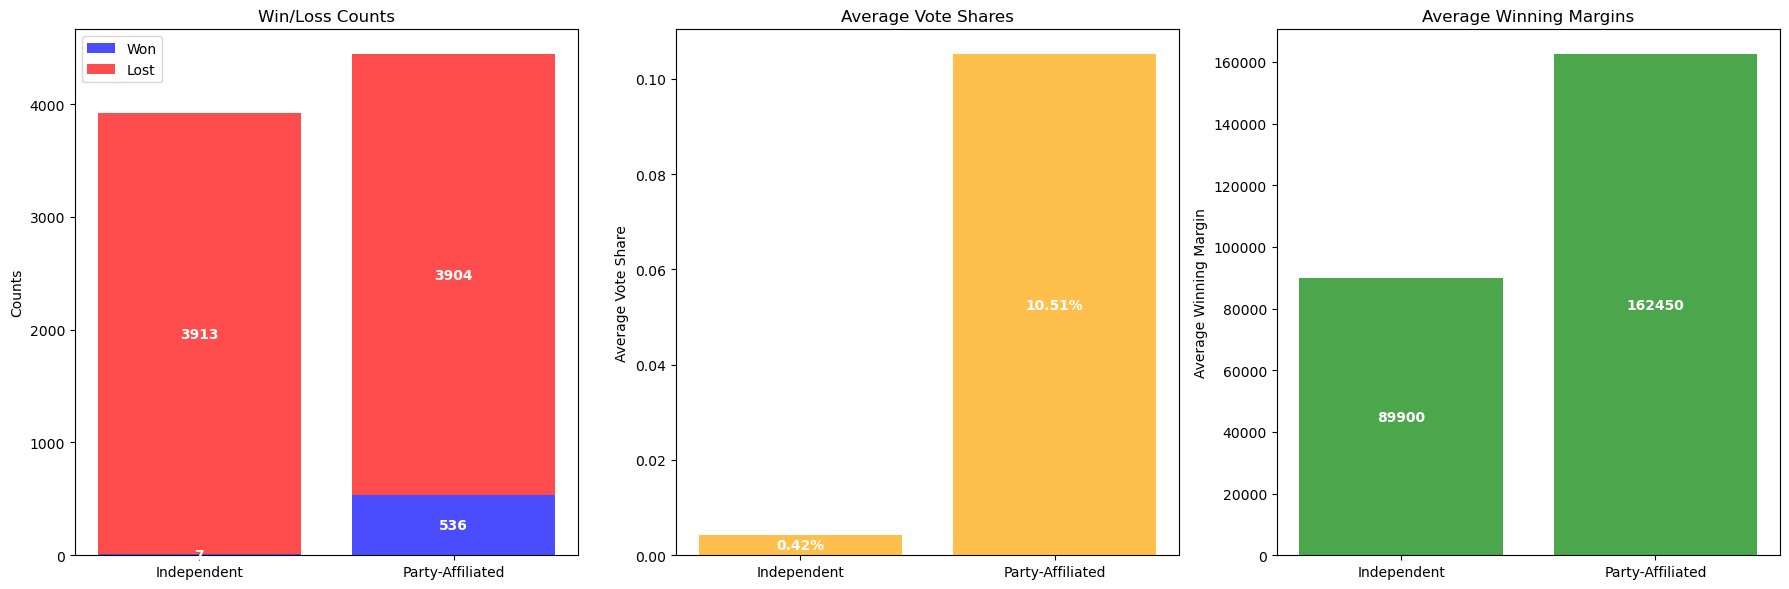

In [9]:
# Analyze the performance of independent candidates vs party-affiliated candidates
df['candidate_type'] = df['party'].apply(lambda x: 'Independent' if x == 'Independent' else 'Party-Affiliated')

# Win/Loss counts
win_loss_counts = df.groupby(['candidate_type', 'result']).size().unstack(fill_value=0).reset_index()

# Vote shares
df['total_votes'] = df.groupby('constituency')['votes'].transform('sum')
df['vote_share'] = df['votes'] / df['total_votes']
average_vote_share = df.groupby('candidate_type')['vote_share'].mean().reset_index()

# Winning margins
df_sorted = df.sort_values(by=['constituency', 'votes'], ascending=[True, False])
df_sorted['next_votes'] = df_sorted.groupby('constituency')['votes'].shift(-1)
df_sorted['winning_margin'] = df_sorted['votes'] - df_sorted['next_votes'].fillna(0)
average_winning_margin = df_sorted[df_sorted['result'] == 'won'].groupby('candidate_type')['winning_margin'].mean().reset_index()

# Merge results into a performance summary
performance_summary = pd.merge(win_loss_counts, average_vote_share, on='candidate_type')
performance_summary = pd.merge(performance_summary, average_winning_margin, on='candidate_type')

# Rename columns for clarity
performance_summary.columns = ['Candidate Type', 'Lost', 'Won', 'Average Vote Share', 'Average Winning Margin']

# Print performance summary
print(performance_summary)

# Plotting
plt.figure(figsize=(18, 6))

# Plotting Win/Loss Counts
plt.subplot(1, 3, 1)
plt.bar(performance_summary['Candidate Type'], performance_summary['Won'], label='Won', alpha=0.7, color='blue')
plt.bar(performance_summary['Candidate Type'], performance_summary['Lost'], bottom=performance_summary['Won'], label='Lost', alpha=0.7, color='red')
plt.ylabel('Counts')
plt.title('Win/Loss Counts')
plt.legend()

# Adding labels to bars
for i in range(len(performance_summary)):
    plt.text(i, performance_summary['Won'][i]/2, performance_summary['Won'][i], ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, performance_summary['Won'][i] + performance_summary['Lost'][i]/2, performance_summary['Lost'][i], ha='center', va='center', color='white', fontweight='bold')

# Plotting Average Vote Shares
plt.subplot(1, 3, 2)
plt.bar(performance_summary['Candidate Type'], performance_summary['Average Vote Share'], color='orange', alpha=0.7)
plt.ylabel('Average Vote Share')
plt.title('Average Vote Shares')

# Adding labels to bars
for i in range(len(performance_summary)):
    plt.text(i, performance_summary['Average Vote Share'][i]/2, f"{performance_summary['Average Vote Share'][i]:.2%}", ha='center', va='center', color='white', fontweight='bold')

# Plotting Average Winning Margins
plt.subplot(1, 3, 3)
plt.bar(performance_summary['Candidate Type'], performance_summary['Average Winning Margin'], color='green', alpha=0.7)
plt.ylabel('Average Winning Margin')
plt.title('Average Winning Margins')

# Adding labels to bars
for i in range(len(performance_summary)):
    plt.text(i, performance_summary['Average Winning Margin'][i]/2, int(performance_summary['Average Winning Margin'][i]), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the dataset
file_path = 'CLEANED_DATA.CSV'
df = pd.read_csv(file_path)

# Ensure 'votes' column is correctly converted to integers, handling non-numeric values
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)

# Calculate voter turnout for each constituency
voter_turnout = df.groupby('constituency')['votes'].sum().reset_index()

# Display the top 10 constituencies by voter turnout using PrettyTable
top_n = 10
top_voter_turnout = voter_turnout.nlargest(top_n, 'votes')
bottom_voter_turnout = voter_turnout.nsmallest(top_n, 'votes')

table = PrettyTable()
table.field_names = ["Constituency", "Total Votes"]

for _, row in top_voter_turnout.iterrows():
    table.add_row([row['constituency'], f"{row['votes']:,}"])

print("Top 10 Constituencies by Voter Turnout")
print(table)

# Display the bottom 10 constituencies by voter turnout using PrettyTable
table.clear_rows()
for _, row in bottom_voter_turnout.iterrows():
    table.add_row([row['constituency'], f"{row['votes']:,}"])

print("\nBottom 10 Constituencies by Voter Turnout")
print(table)
print("0 votes means that the candidate was uncontested in that constituency.")

Top 10 Constituencies by Voter Turnout
+------------------+-------------+
|   Constituency   | Total Votes |
+------------------+-------------+
|      Dhubri      |  2,453,608  |
|    Aurangabad    |  2,248,077  |
|   Maharajganj    |  2,224,560  |
|    Malkajgiri    |  1,933,843  |
| Bangalore Rural  |  1,919,540  |
| Darrang-Udalguri |  1,811,200  |
| Bangalore North  |  1,752,504  |
|      BARMER      |  1,688,051  |
|     Barpeta      |  1,685,943  |
|     Chevella     |  1,675,354  |
+------------------+-------------+

Bottom 10 Constituencies by Voter Turnout
+---------------------------+-------------+
|        Constituency       | Total Votes |
+---------------------------+-------------+
|           Surat           |      0      |
|        Lakshadweep        |    49,200   |
|        Daman & Diu        |    92,410   |
|           Ladakh          |   135,524   |
| Andaman & Nicobar Islands |   202,514   |
|    Dadar & Nagar Haveli   |   205,588   |
|       Arunachal East      |   

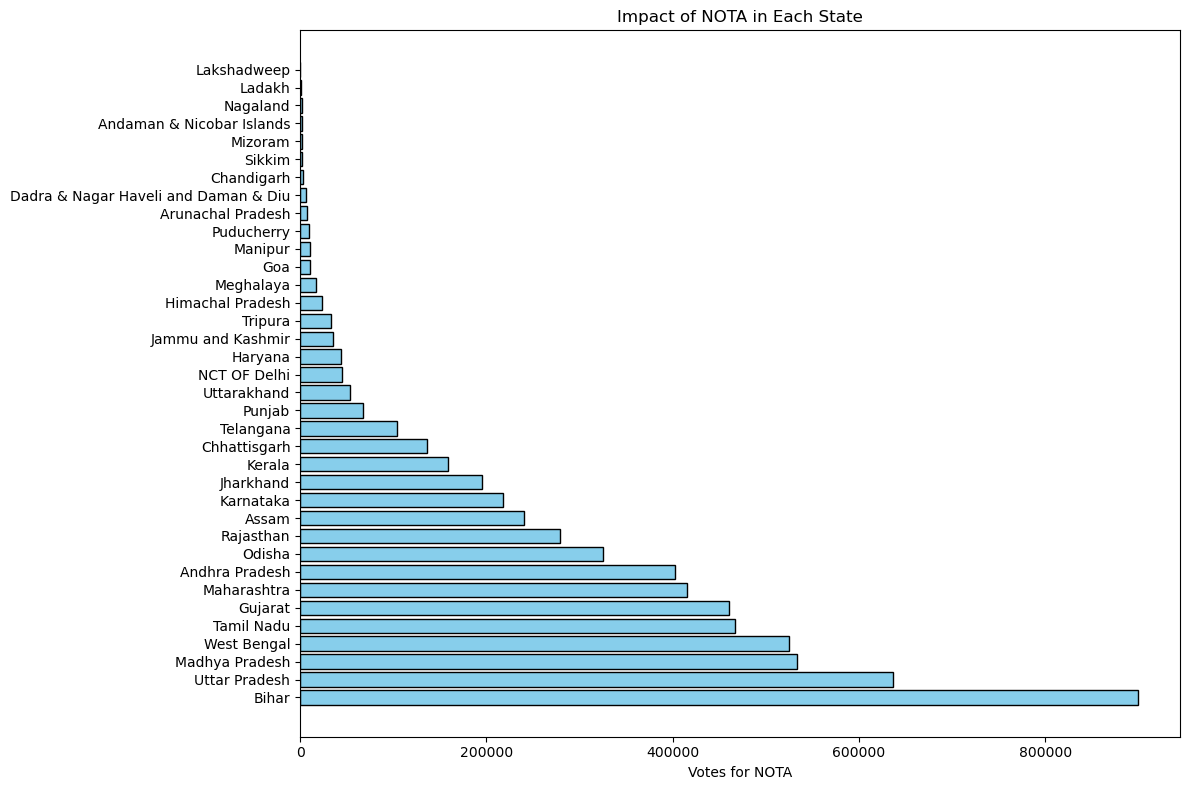

In [11]:

# Filter NOTA votes
nota_df = df[df['party'] == 'None of the Above']

# Group by state and sum votes
nota_votes_by_state = nota_df.groupby('state')['votes'].sum().reset_index()

# Add total votes for each state to calculate the percentage of NOTA votes
total_votes_by_state = df.groupby('state')['votes'].sum().reset_index()
nota_votes_by_state = pd.merge(nota_votes_by_state, total_votes_by_state, on='state', suffixes=('_nota', '_total'))

# Calculate percentage of NOTA votes
nota_votes_by_state['percentage'] = (nota_votes_by_state['votes_nota'] / nota_votes_by_state['votes_total']) * 100

# Sort by NOTA votes
nota_votes_by_state = nota_votes_by_state.sort_values(by='votes_nota', ascending=False)

# Plot the impact of NOTA in each state
plt.figure(figsize=(12, 8))
bars = plt.barh(nota_votes_by_state['state'], nota_votes_by_state['votes_nota'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Impact of NOTA in Each State')
plt.xlabel('Votes for NOTA')
# plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', va='center', ha='left', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [12]:
# Analyse highest and lowest votes received by a party
import csv

highest_votes = 0
lowest_votes = float('inf') 
highest_votes_state = ""
lowest_votes_state = ""

with open('CLEANED_DATA.CSV', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        votes = int(row['votes']) if row['votes'] else 0
        state = row['state']
        if votes > highest_votes:
            highest_votes = votes
            highest_votes_state = state
        if 0 < votes < lowest_votes:
            lowest_votes = votes
            lowest_votes_state = state

print(f"Highest votes received by a party: {highest_votes_state} with {highest_votes} votes")
print(f"Lowest votes received by a party: {lowest_votes_state} with {lowest_votes} votes")

Highest votes received by a party: Assam with 1471885 votes
Lowest votes received by a party: Lakshadweep with 61 votes


                       name                     party    votes
596         RAKIBUL HUSSAIN  Indian National Congress  1471885
3459        SHANKAR LALWANI    Bharatiya Janata Party  1226751
3276  SHIVRAJ SINGH CHOUHAN    Bharatiya Janata Party  1116460
2685       DR C N MANJUNATH    Bharatiya Janata Party  1079002
1239      BRIJMOHAN AGRAWAL    Bharatiya Janata Party  1050351


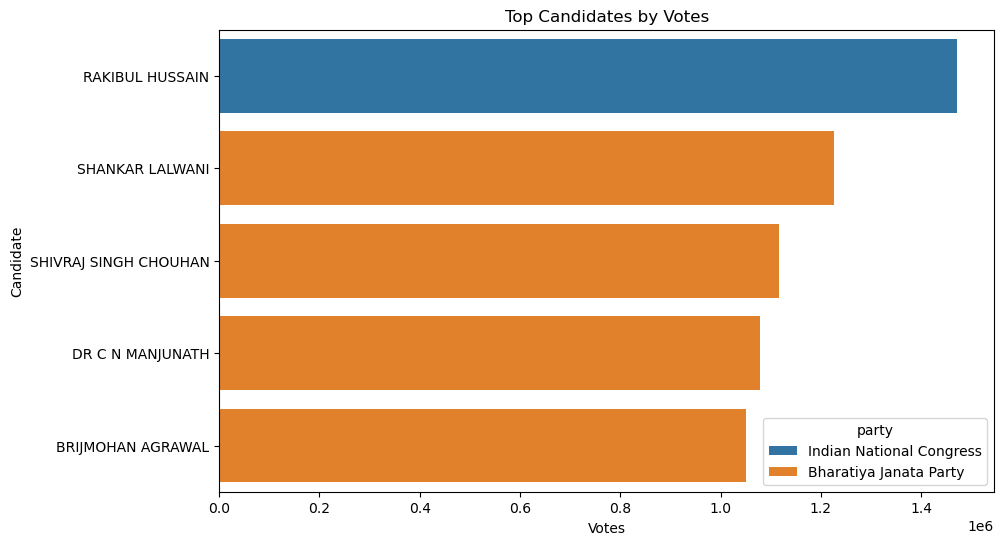

In [13]:
# Analyse the top candidates by votes
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

df_sorted = df.sort_values(by='votes', ascending=False)

top_candidates = df_sorted.head(5)

print(top_candidates[['name', 'party', 'votes']])
plt.figure(figsize=(10, 6))
sns.barplot(x='votes', y='name', data=top_candidates, hue='party', dodge=False)
plt.title('Top Candidates by Votes')
plt.xlabel('Votes')
plt.ylabel('Candidate')
plt.show()

Top State in Voter Turnout: Uttar Pradesh with 87911642 votes
Bottom State in Voter Turnout: Lakshadweep with 49200 votes


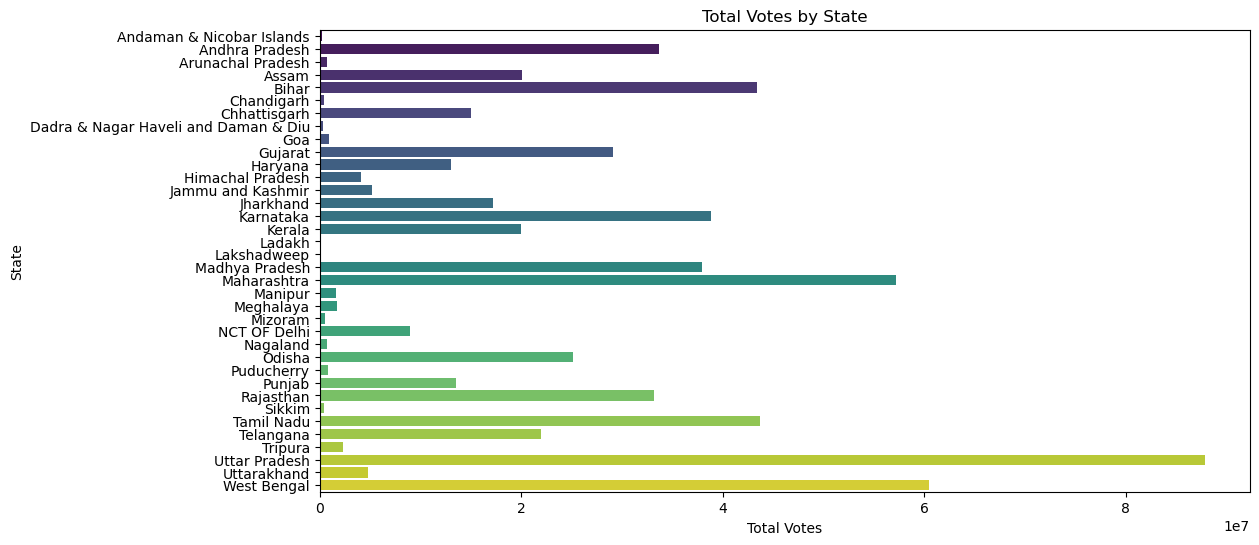

In [14]:
# top state in terms of voter turnout
top_state = df.groupby('state')['votes'].sum().idxmax()
top_state_votes = df.groupby('state')['votes'].sum().max()

# bottom state in terms of voter turnout
bottom_state = df.groupby('state')['votes'].sum().idxmin()
bottom_state_votes = df.groupby('state')['votes'].sum().min()

print(f'Top State in Voter Turnout: {top_state} with {top_state_votes} votes')
print(f'Bottom State in Voter Turnout: {bottom_state} with {bottom_state_votes} votes')

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='votes', y='state', data=df, estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Votes by State')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.show()

BJP Wins: 240, Congress Wins: 99
BJP Vote Share: 235973935, Congress Vote Share: 136759064
BJP Average Margin: 104114.56009070294, Congress Average Margin: 39652.20121951219


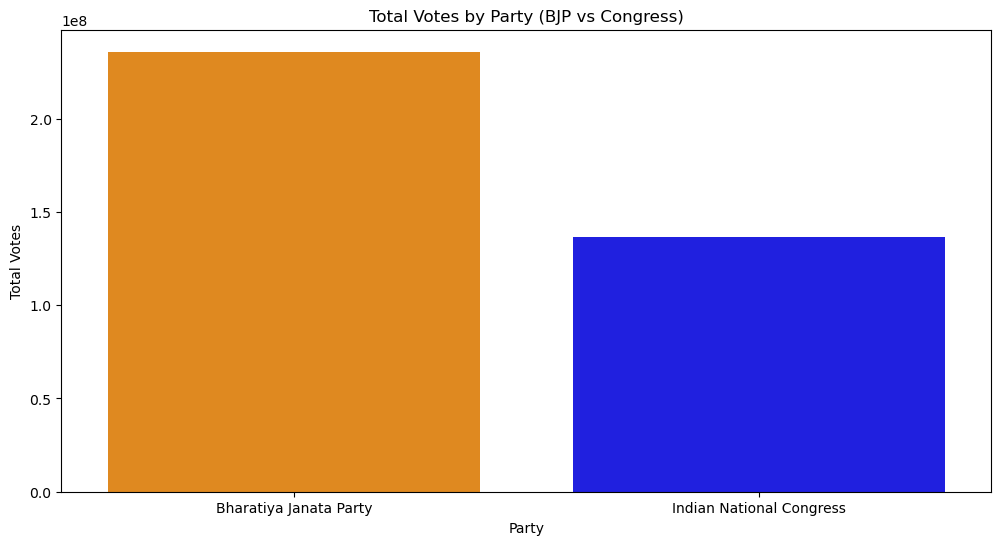

In [15]:
# Filter data for BJP and Congress and explicitly create a copy
bjp_congress_data = df[df['party'].isin(['Bharatiya Janata Party', 'Indian National Congress'])].copy()

# The rest of your code remains the same
bjp_wins = (bjp_congress_data['party'] == 'Bharatiya Janata Party') & (bjp_congress_data['result'] == 'won')
congress_wins = (bjp_congress_data['party'] == 'Indian National Congress') & (bjp_congress_data['result'] == 'won')

bjp_votes = bjp_congress_data[bjp_congress_data['party'] == 'Bharatiya Janata Party']['votes'].sum()
congress_votes = bjp_congress_data[bjp_congress_data['party'] == 'Indian National Congress']['votes'].sum()

bjp_congress_data['abs_margin'] = bjp_congress_data['margin'].apply(lambda x: abs(int(x.replace('+', '').strip())) if x.replace('+', '').strip().isdigit() else 0)
bjp_avg_margin = bjp_congress_data[bjp_congress_data['party'] == 'Bharatiya Janata Party']['abs_margin'].mean()
congress_avg_margin = bjp_congress_data[bjp_congress_data['party'] == 'Indian National Congress']['abs_margin'].mean()

print(f"BJP Wins: {bjp_wins.sum()}, Congress Wins: {congress_wins.sum()}")
print(f"BJP Vote Share: {bjp_votes}, Congress Vote Share: {congress_votes}")
print(f"BJP Average Margin: {bjp_avg_margin}, Congress Average Margin: {congress_avg_margin}")

plt.figure(figsize=(12, 6))
sns.barplot(x='party', y='votes', data=bjp_congress_data, estimator=sum, errorbar=None, palette=['darkorange', 'blue'])
plt.title('Total Votes by Party (BJP vs Congress)')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()